In [391]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
import tkinter as tk
from joblib import dump, load

In [155]:
def traitement():
    images_traitees = {}
    for i in range(0, 10):
        # Lecture en niveaux de gris
        img = cv.imread(f"../data/Images_test/Chiffre_{i}.jpg", cv.IMREAD_GRAYSCALE)
        
        # Flouter légèrement pour réduire le bruit
        img = cv.GaussianBlur(img, (3, 3), 0)
        
        # Binarisation (noir/blanc)
        _, th = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
        
        # Trouver le bounding box du chiffre
        coords = cv.findNonZero(th)
        x, y, w, h = cv.boundingRect(coords)
        roi = th[y:y+h, x:x+w]
        
        # Redimensionner le chiffre (par ex. 20x20)
        digit = cv.resize(roi, (20, 20), interpolation=cv.INTER_AREA)
        
        # Le replacer dans une image noire 28x28, centré
        canvas = np.zeros((28, 28), dtype=np.uint8)
        x_offset = (28 - 20) // 2
        y_offset = (28 - 20) // 2
        canvas[y_offset:y_offset+20, x_offset:x_offset+20] = digit

        images_traitees[i] = canvas

        
    return images_traitees

In [ ]:
def best_model(path):
    biggest_score = 0
    best_model = ""
    for artefact_name in os.listdir(path):
        if artefact_name != ".ipynb_checkpoints":
            score = int(artefact_name[-4:])
            if score > biggest_score:
                biggest_score = score
                best_model = artefact_name
    path_best_model = path + best_model
    model = load(path_best_model)
    return model
            

def prediction(models_array, dossier_images):    

    models_names = str(models_array).split(',')[3:6]
    # ici j'extraie le nom de chaque modèle de la liste models_array passée en paramètre
    # Ce bout de code n'est pas généraliste et peut provoquer des bugs d'affichage si
    # j'utilise d'autres modèles

    
    # dossier_images est un dictionnaire donc on y accède par index
    for i in range(len(dossier_images)):
        img = dossier_images[i]
        plt.figure(figsize=(2, 2))
        plt.imshow(img, cmap='gray')

        text_model_prediction = ""
        for j in range(len(models_array)):
            vector_image = img.reshape((1, len(img)*len(img)))
            prediction = models_array[j].predict(vector_image)
            text_model_prediction += models_names[j].split('(')[0] + ':' + str(prediction[0])

        plt.figtext(x=0.2, y=-0.25, s=text_model_prediction, wrap=True)
        plt.show()
            


In [387]:
dossier = traitement()
GaussianNB = best_model("../saved_models/GaussianNB_persistent/")
MultinomialNB = best_model("../saved_models/MultinomialNB_persistent/")
BernoulliNB = best_model("../saved_models/BernoulliNB_persistent/")

models_array = [GaussianNB, MultinomialNB, BernoulliNB]

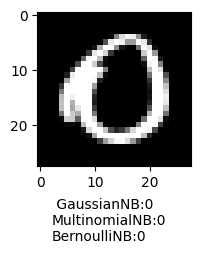

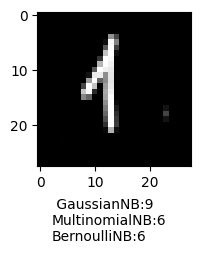

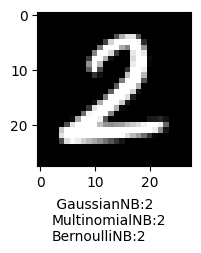

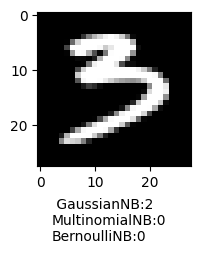

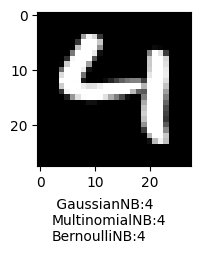

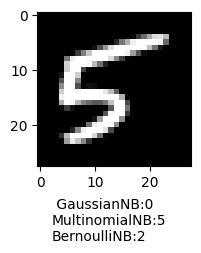

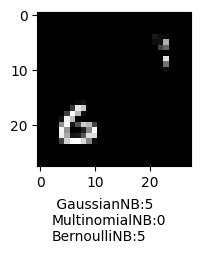

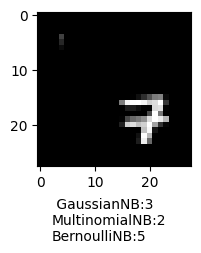

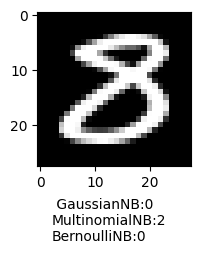

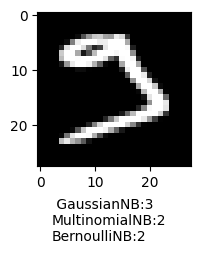

In [388]:
prediction(models_array, dossier)